<a href="https://colab.research.google.com/github/rajitbasu/Deep_Learning/blob/main/DL_ASSIGNMENT_Q2_20MAI0019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# RAJIT BASU_20MAI0019
# Github_link

https://github.com/rajitbasu/Deep_Learning/blob/main/DL_ASSIGNMENT_Q2_20MAI0019.ipynb

In [2]:
import  numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
#importing dataset
data =pd.read_csv("/content/drive/MyDrive/loan.csv")

In [6]:
data.shape

(10000, 14)

In [7]:
dataset.head()

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12
0,0,23201.5,15.4840,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN
1,1,7425.0,11.2032,B,Accountant,<=5 years,OWNER,102000.0,2014-05-08,0,Car purchase,13.0,2016-01-25,NaN
2,2,11150.0,8.5100,A,Statistician,<=5 years,RENT,69840.0,2013-10-26,0,Debt consolidation,8.0,2014-09-26,NaN
3,3,7600.0,5.8656,A,Other,<=5 years,RENT,100386.0,2015-08-20,0,Debt consolidation,20.0,2016-01-26,NaN
4,4,31960.0,18.7392,E,Bus driver,>5 years,RENT,95040.0,2014-07-22,0,Debt consolidation,14.0,2016-01-11,NaN


In [8]:
data['target'].unique()

array([0, 1])

In [14]:
# Continous Variables
dataset['disbursed_amount'].unique()

array([23201.5 ,  7425.  , 11150.  , ...,  6279.  , 12894.75, 25584.  ])

In [15]:
dataset['interest'].unique()

array([15.484 , 11.2032,  8.51  , ..., 12.9195, 11.2332, 11.0019])

In [16]:
dataset['number_open_accounts'].unique()

array([ 4., 13.,  8., 20., 14.,  5.,  9., 18., 16., 17., 12., 15.,  6.,
       10., 11.,  7., 21., 19., 26.,  2., 22., 27., 23., 25., 24., 28.,
        3., 30., 41., 32., 33., 31., 29., 37., 49., 34., 35., 38.,  1.,
       36., 42., 47., 40., 44., 43.])

In [17]:
dataset['householder'].value_counts()

MORTGAGE    4957
RENT        4055
OWNER        988
Name: householder, dtype: int64

In [18]:
dataset[['date_issued','date_last_payment']].dtypes

date_issued          object
date_last_payment    object
dtype: object

In [19]:
dataset['date_issued_dt'] = pd.to_datetime(dataset['date_issued'])

In [20]:
dataset['date_last_payment_dt'] = pd.to_datetime(dataset['date_last_payment'])

In [21]:
dataset['year']= dataset['date_issued_dt'].dt.year

In [22]:
dataset['month']= dataset['date_issued_dt'].dt.month

In [27]:
dataset.tail()

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12,date_issued_dt,date_last_payment_dt,year,month
9995,9995,23750.0,11.0019,B,Civil Servant,<=5 years,MORTGAGE,98000.0,2010-01-14,0,Other,12.0,2010-11-03,NaN,2010-01-14,2010-11-03,2010,1
9996,9996,11880.0,10.4923,B,Civil Servant,<=5 years,RENT,36270.0,2015-03-20,0,Debt consolidation,17.0,2016-01-26,NaN,2015-03-20,2016-01-26,2015,3
9997,9997,19950.0,8.4364,B,Accountant,>5 years,OWNER,52250.0,2015-04-03,0,Debt consolidation,9.0,2015-12-12,NaN,2015-04-03,2015-12-12,2015,4
9998,9998,4850.0,13.6409,C,Bus driver,>5 years,RENT,80040.0,2014-11-23,0,Debt consolidation,26.0,2016-01-01,NaN,2014-11-23,2016-01-01,2014,11
9999,9999,25584.0,17.1456,D,Accountant,>5 years,MORTGAGE,72000.0,2015-01-19,0,Debt consolidation,5.0,2016-01-16,NaN,2015-01-19,2016-01-16,2015,1


In [26]:
dataset.shape

(10000, 18)

In [36]:
X=dataset.iloc[:, [0,1,2,7,11,16,17]].values
y=dataset.iloc[:,9].values

In [37]:
#splitting into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.1, random_state =0)

In [38]:
from sklearn.linear_model import Perceptron
per=Perceptron(random_state=0)

In [39]:
per.fit(X_train,y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [40]:
pred=per.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score
print('Accuracy score')
accuracy_score(y_test,pred)*100

Accuracy score


98.8

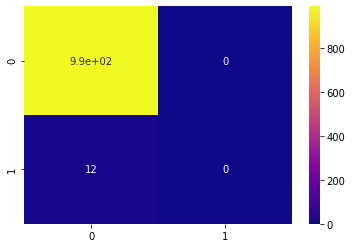

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm1=confusion_matrix(y_test,pred)
sns.heatmap(cm1, cmap="plasma",annot=True)